# COMP2200 Assignment 2

## Project Title
"Predicting Mental Health Outcomes in the Tech Workforce Using Work Environment and Lifestyle Data"

## 1. Overview & Justification
### 1.1 Project Objective
This project aims to analyse and predict mental health treatment-seeking behavior among employees in the tech industry using the 2014 Mental Health in Tech Survey dataset. Specifically, I aim to develop predictive models to determine whether an individual is likely to have sought treatment for a mental health condition, based on demographic information, work conditions, and employer policies around mental health.

This project is rooted in the broader goal of understanding what workplace and personal factors influence the likelihood of treatment-seeking among tech workers. My analysis will involve both identifying key influencing features and building classification models to assess the predictive value of these features.

### 1.2 Research Questions
**1. Prediction Question:**
* Can whether a tech worker has sought mental health treatment be predicted based on their work environment, employer support, and personal factors?

**2. Exploratory Question:**
* Which workplace policies (e.g remote work, anonymity, mental health benefits) are most strongly associated with treatment-seeking behaviour?

**3. Model Comparison Question:**
* How do the predictive capabilities of a baseline model (logistic regression) compare with more advanced models, such as decision tree and neural network classifiers, when predicting whether individuals in the tech industry seek treatment for mental health conditions?

### 1.3 Dataset Context
The dataset originates from a 2014 survey conducted to measure the frequency of mental health disorders and attitudes toward mental health in the tech workplace. It consists of 1,259 anonymised responses from tech industry employees.

The dataset covers a wide range of features, such as:

- **Demographics:** age, gender, country, and state.
- **Employment details:** self-employment status, company size, remote work status. 
- **Mental health policies:** mental health benefits, access to care options, wellness programs, anonymity, ease of taking medical leave.
- **Attitudinal data:** willingness to discuss mental health with coworkers/supervisors, perceived consequences of disclosure.
- **Personal experience:** family history of mental illness, interference of mental health with work, and whether they’ve sought treatment.

Source: [Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data)


### 1.4 Why This Problem Is Meaningful and Worth Studying
Mental health has become a pressing concern in the tech industry, a field often characterised by high-pressure environments, job insecurity, and workplace isolation. Despite increased awareness, stigma and fear of career repercussions continue to prevent many professionals from seeking support. This project aims to provide data-driven recommendations to promote supportive mental health environments in tech workplaces by analysing which factors most influence treatment-seeking and how employer policies impact these decisions. This research holds significant social and practical relevance for employee well-being and organisational health.

## 2. Data Preparation, Cleanup, and Exploration
### 2.1 Dataset Source
Source: [Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data)

### 2.2 Variable Identification
The dataset includes both categorical and numerical features. Key variables identified for the analysis include:

#### Target Variable:
- **treatment** (Whether the respondent has sought mental health treatment)

#### Predictor Variables:

- **Demographic:** age, gender, country, self-employed, family_history
- **Work Environment:** no_employees, remote_work, tech_company
- **Employer Support:** benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence
- **Attitudes & Behavior:** coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequ

### 2.3 Imports

In [271]:
# Data manipulation and visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

### 2.4 Load Dataset & Initial Inspection
This cell loads the survey dataset and performs an initial inspection. I check the dataset size, preview the first few rows, and review data types and missing values. Summary statistics reveal data distributions and highlight issues such as missing entries and invalid age values, which will be addressed in data cleaning steps.

In [231]:
# Load dataset
df = pd.read_csv("survey.csv")

# Initial inspection
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and missing values:")
display(df.info())

print("\nSummary statistics:")
display(df.describe(include='all'))

Dataset shape: (1259, 27)

First 5 rows:


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259

None


Summary statistics:


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.5 Missing Value Treatment
This cell handles missing values in the dataset. It first identifies columns with missing data, then removes irrelevant or sparsely populated columns (‘Timestamp’, ‘state’, and ‘comments’). Missing values in ‘self_employed’ are filled with the mode, and ‘work_interfere’ missing entries are replaced with ‘Not applicable’. After this, there are no remaining missing values, and the cleaned dataset is saved for further analysis.

In [234]:
# Check missing values
print("Missing values per column (before cleaning):")
display(df.isnull().sum().sort_values(ascending=False))

# Drop irrelevant or highly missing columns
df_clean = df.drop(['Timestamp', 'state', 'comments'], axis=1).copy()

# Impute 'self_employed' w mode
df_clean['self_employed'] = df_clean['self_employed'].fillna(df_clean['self_employed'].mode()[0])

# Impute 'work_interfere' w 'Not applicable' category for missing
df_clean['work_interfere'] = df_clean['work_interfere'].fillna('Not applicable')

print("\nMissing values after cleaning:")
display(df_clean.isnull().sum().sort_values(ascending=False))

print(f"\nTotal missing values after cleaning: {df_clean.isnull().sum().sum()}")
print(f"Dataset shape after cleaning: {df_clean.shape}")

df = df_clean.copy()

Missing values per column (before cleaning):


comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64


Missing values after cleaning:


Age                          0
Gender                       0
mental_vs_physical           0
phys_health_interview        0
mental_health_interview      0
supervisor                   0
coworkers                    0
phys_health_consequence      0
mental_health_consequence    0
leave                        0
anonymity                    0
seek_help                    0
wellness_program             0
care_options                 0
benefits                     0
tech_company                 0
remote_work                  0
no_employees                 0
work_interfere               0
treatment                    0
family_history               0
self_employed                0
Country                      0
obs_consequence              0
dtype: int64


Total missing values after cleaning: 0
Dataset shape after cleaning: (1259, 24)


### 2.6 Data Cleaning (Age and Gender)
Filtered dataset to keep only valid ages between 18 and 100. Standardised gender entries by mapping common female and male variants to “Female” and “Male,” respectively; all other responses were labelled as “Other.” This ensures consistent and meaningful gender categories for analysis.

In [237]:
# Remove invalid ages (retain only 18–100)
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# Standardise gender labels
def clean_gender(g):
    g = str(g).strip().lower()
    female_terms = ['female', 'f', 'woman', 'female ', 'cis female', 'femme']
    male_terms = ['male', 'm', 'man', 'male ', 'cis male']
    
    if any(term in g for term in female_terms):
        return "Female"
    elif any(term in g for term in male_terms):
        return "Male"
    else:
        return "Other"

df["Gender"] = df["Gender"].apply(clean_gender)

# Check distribution of cleaned gender values
print("Gender value counts after cleaning:")
print(df["Gender"].value_counts())
print("\nNumber of entries labelled 'Other':", (df["Gender"] == "Other").sum())

Gender value counts after cleaning:
Gender
Male      989
Female    252
Other      10
Name: count, dtype: int64

Number of entries labelled 'Other': 10


### 2.7 Univariate Analysis
Visualised the distribution of the target variable treatment using a count plot and printed its relative frequencies. Also examined the age distribution with a histogram including a KDE curve, and displayed the frequency of gender categories with a bar chart. This helps understand the basic makeup and balance of key variables.

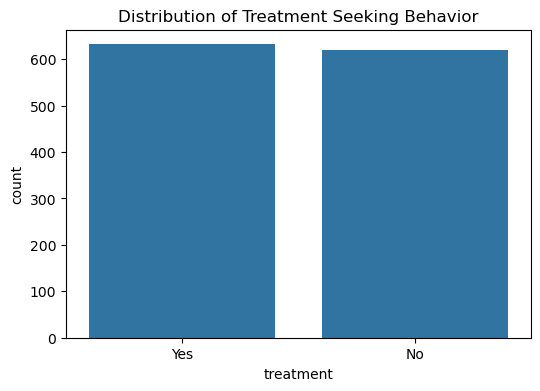


Treatment seeking rates:


treatment
Yes    0.505196
No     0.494804
Name: proportion, dtype: float64

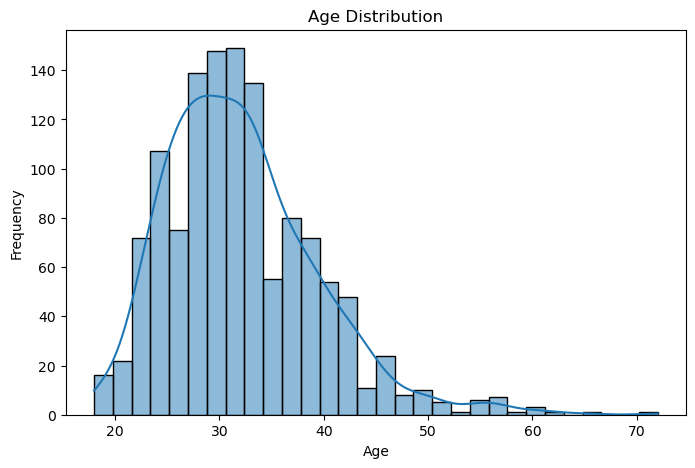

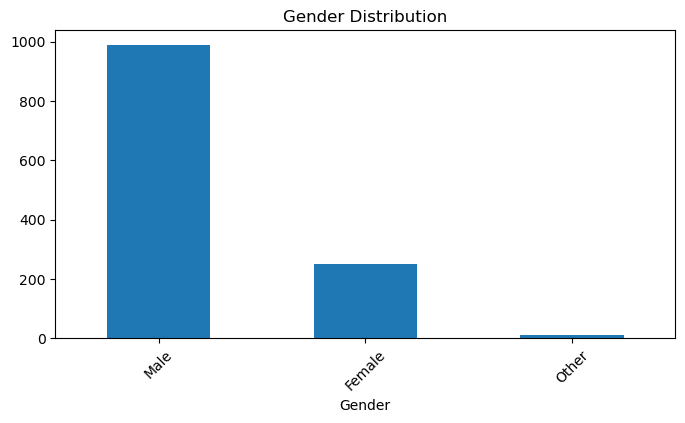

In [240]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='treatment', data=df)
plt.title('Distribution of Treatment Seeking Behavior')
plt.show()

print("\nTreatment seeking rates:")
display(df['treatment'].value_counts(normalize=True))

# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender distribution
plt.figure(figsize=(8, 4))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

**Interpretation:**
About 50% of participants sought mental health treatment, indicating a substantial portion affected or aware of mental health needs. Age distribution peaks in young to middle adulthood, typical for tech industry demographics. Gender counts show a majority of male participants.

### 2.8 Bivariate Analysis
Explored relationships between the target variable treatment and key categorical features (Gender, family_history, and remote_work) using count plots with treatment status as hue. This reveals how treatment-seeking behavior varies across these groups.

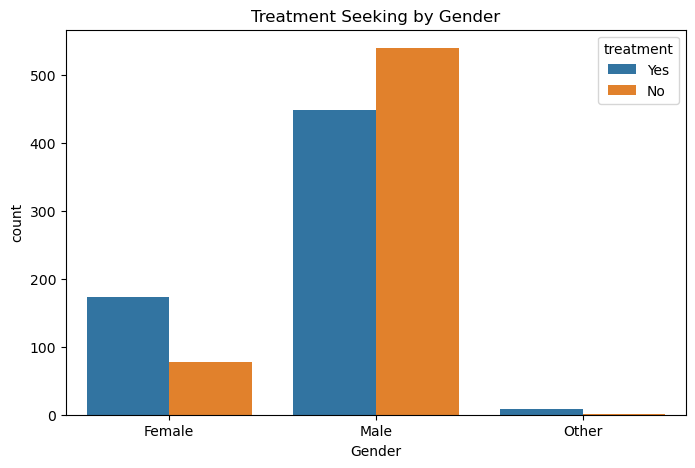

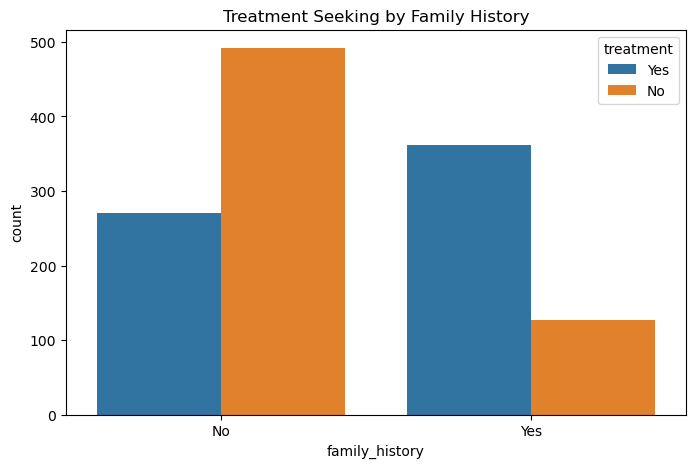

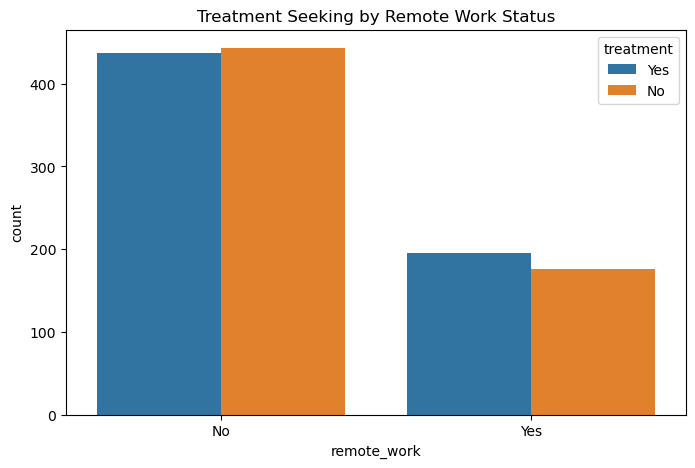

In [244]:
# Treatment by Gender
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Gender", hue="treatment")
plt.title("Treatment Seeking by Gender")
plt.show()

# Treatment by Family History
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="family_history", hue="treatment")
plt.title("Treatment Seeking by Family History")
plt.show()

# Treatment by Remote Work
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="remote_work", hue="treatment")
plt.title("Treatment Seeking by Remote Work Status")
plt.show()

**Interpretation:**
Treatment seeking varies by gender, males are the majority but all groups show treatment seekers. Those with a family history of mental illness are more likely to seek treatment, showing familial influence on behavior. Remote work status shows less clear distinction, this suggests other factors may play stronger roles.

## 3 Prediction Modelling and Model Comparison
### 3.1 Objective
This section aims to predict whether a tech industry employee has sought mental health treatment based on demographic, workplace, and employer support factors.
It also evaluates the effectiveness of different machine learning models in making this prediction.

Specifically, I will compare the performance of:
- **Baseline Model:** Logistic Regression
- **Model 1:** Decision Tree Classifier
- **Model 2:** Neural Network (MLPClassifier)

### 3.2 Data Preparation for Modelling
The dataset is split into features (X) and target (y). Categorical features are one-hot encoded, and the target variable is label encoded into binary values. The data is then split into training and testing sets with stratification to maintain class balance. Finally, features are standardised using StandardScaler to improve model performance for algorithms sensitive to feature scaling.

In [251]:
# Define target & features
X = df.drop('treatment', axis=1).copy()
y = df['treatment']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode target variable to binary labels
y_encoded = LabelEncoder().fit_transform(y)

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Scale features for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3.3 Baseline Model: Logistic Regression
Logistic Regression is used as the baseline classifier for its simplicity and interpretability. The model is trained on the scaled training data, then evaluated on the test set. Performance metrics including accuracy, precision, recall, F1-score, and AUC indicate solid predictive ability, with an accuracy of 0.814 and AUC of 0.858.

In [255]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print(f"Logistic Regression Accuracy: {logreg.score(X_test_scaled, y_test):.3f}")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]):.3f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       186
           1       0.78      0.89      0.83       190

    accuracy                           0.81       376
   macro avg       0.82      0.81      0.81       376
weighted avg       0.82      0.81      0.81       376

Logistic Regression Accuracy: 0.814
Logistic Regression AUC: 0.863


### 3.4 Decision Tree Classifier
A Decision Tree classifier with a maximum depth of 5 was trained on the dataset. It achieved an accuracy of 0.779 and an AUC of 0.833. The model was evaluated using precision, recall, and F1-score metrics on the test set.

In [259]:
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print(f"Decision Tree Accuracy: {tree.score(X_test, y_test):.3f}")
print(f"Decision Tree AUC: {roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]):.3f}")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.62      0.75       186
           1       0.72      0.95      0.82       190

    accuracy                           0.79       376
   macro avg       0.82      0.79      0.78       376
weighted avg       0.82      0.79      0.78       376

Decision Tree Accuracy: 0.790
Decision Tree AUC: 0.850


#### 3.4.1 Hyperparameter Tuning: Decision Tree
To improve model performance, I performed hyperparameter tuning on the Decision Tree using GridSearchCV.  
The goal was to find the best configuration for `max_depth` and `min_samples_split`.

This also serves as a parameter analysis to explore how model performance changes under different settings.

In [277]:
# Define
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for Decision Tree
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc'
)

grid_search.fit(X_train, y_train)

# Best parameters & corresponding performance
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validated AUC: {grid_search.best_score_:.3f}")

Best Parameters: {'max_depth': 5, 'min_samples_split': 5}
Best Cross-Validated AUC: 0.850


To explore the impact of hyperparameters on model performance, I performed a grid search with cross-validation over two key parameters:
- `max_depth`: controls the maximum depth of the tree.
- `min_samples_split`: defines the minimum number of samples required to split an internal node.

The optimal parameters were found to be:
- `max_depth = 5`
- `min_samples_split = 5`

This configuration achieved a **cross-validated AUC of 0.850**, which matches the AUC of the default model.  
While the performance did not improve, this analysis demonstrates that the untuned model was already operating near optimal capacity within the selected parameter range.  
This highlights the importance of hyperparameter analysis not only for optimisation, but also for confirming model robustness.

### 3.5 Neural Network Classifier (MLP)
A Neural Network (MLPClassifier) with one hidden layer of 50 neurons was trained using scaled input features. The model achieved an accuracy of 81.1% and an AUC of 0.872 on the test set, with evaluation based on classification metrics such as precision, recall, and F1-score.

In [262]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

print(f"MLP Accuracy: {mlp.score(X_test_scaled, y_test):.3f}")
print(f"MLP AUC: {roc_auc_score(y_test, mlp.predict_proba(X_test_scaled)[:, 1]):.3f}")


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       186
           1       0.73      0.82      0.77       190

    accuracy                           0.76       376
   macro avg       0.76      0.76      0.76       376
weighted avg       0.76      0.76      0.76       376

MLP Accuracy: 0.758
MLP AUC: 0.825


### 3.6 Feature Importance 
The feature importance plot displays the top predictors from the Decision Tree model. Notably, workplace interference variables (e.g., work_interfere_Often, work_interfere_Sometimes) and family history of mental illness (family_history_Yes) rank highly. This suggests that how mental health affects work performance and family mental health history are influential factors in predicting whether an employee seeks treatment.

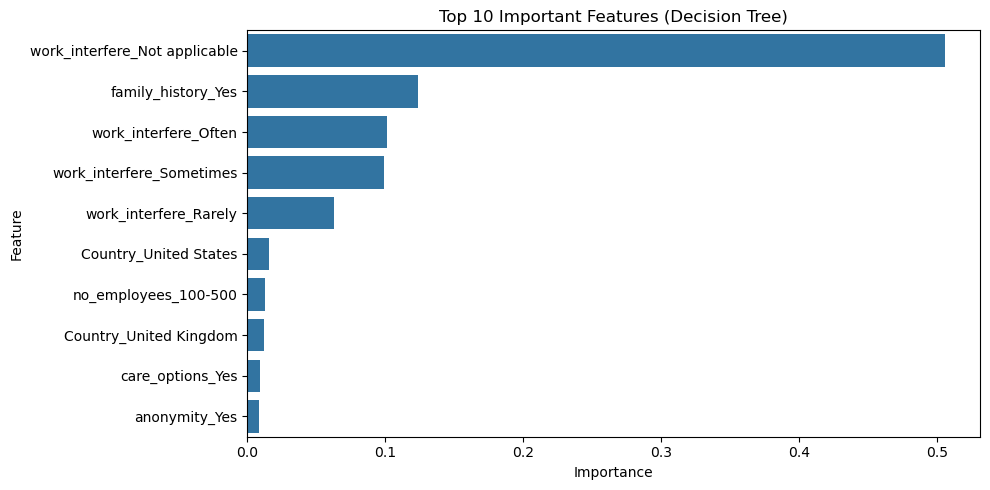

In [292]:
# Feature importance from Decision Tree
importances = tree.feature_importances_
feature_names = X_encoded.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title("Top 10 Important Features (Decision Tree)")
plt.tight_layout()
plt.show()

### 3.7 Compact Comparison Table
The table summarises the performance of three classification models predicting treatment-seeking behavior. 

In [300]:
# Model comparison summary
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Neural Network'],
    'Accuracy': [logreg.score(X_test_scaled, y_test),
                 tree.score(X_test, y_test),
                 mlp.score(X_test_scaled, y_test)],
    'AUC': [roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]),
            roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]),
            roc_auc_score(y_test, mlp.predict_proba(X_test_scaled)[:, 1])]
})

display(results.round(3))

,Model,Accuracy,AUC
0,Logistic Regression,0.814,0.863
1,Decision Tree,0.790,0.850
2,Neural Network,0.758,0.825
